In [42]:
from collections import Counter
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import utils

## Day 7: The Treachery of Whales

[#](https://adventofcode.com/2021/day/7) Escape the whale! We need to align a bunch of crabs.

There probably is a clever way to do this but I'm just using brute force:

In [105]:
test: str = """16,1,2,0,4,2,7,1,2,14
"""

raw_inp = utils.get_input(7, splitlines=False)

In [106]:
def parse(inp=test, verbose=False):
    return [int(i) for i in inp.split(",")]


crabs = parse()
crabs[:10]

[16, 1, 2, 0, 4, 2, 7, 1, 2, 14]

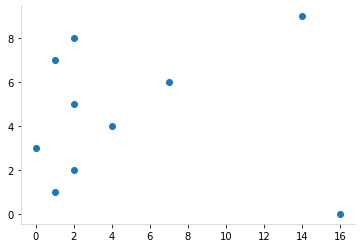

In [108]:
plt.scatter(crabs, np.arange(len(crabs)));

In [109]:
def solve(inp=test, verbose: bool = False):

    crabs = parse(inp)

    costs = []

    for target in range(min(crabs), max(crabs) + 1):
        fuel = 0

        for crab in crabs:
            fuel += (crab - target) if crab > target else (target - crab)
        costs.append(fuel)

    return min(costs)


assert solve() == 37
solve(raw_inp)

328318

## Part 2

Costs increase linearly for every step:

> each change of 1 step in horizontal position costs 1 more unit of fuel than the last: the first step costs 1, the second step costs 2, the third step costs 3, and so on.

Recalc the lowest post position for the crabs


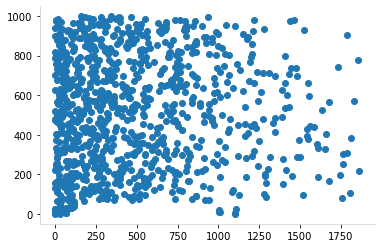

In [111]:
c = parse(raw_inp)
plt.scatter(c, np.arange(len(c)));

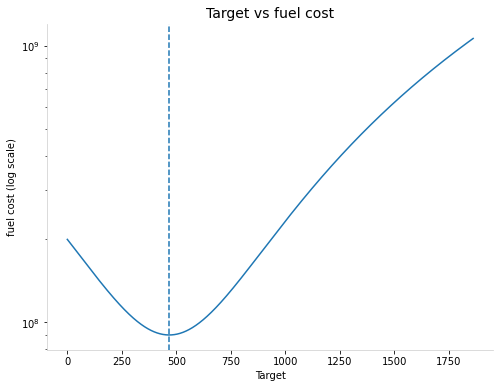

89791146

In [127]:
def solve_2(inp=test, verbose: bool = False):

    crabs = parse(inp)

    costs = []
    targets = np.arange(min(crabs), max(crabs) + 1)

    for i, target in enumerate(targets):
        fuel = 0

        for crab in crabs:
            fuel += (
                np.arange(1, crab + 1 - target).sum()
                if crab > target
                else np.arange(1, target + 1 - crab).sum()
            )
        costs.append(fuel)

    if verbose:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(f"Target vs fuel cost")
        ax.set_xlabel("Target")
        ax.set_yscale("log")
        ax.set_ylabel("fuel cost (log scale)")

        ax.axvline(costs.index(min(costs)), ls="--")
        ax.plot(targets, costs)
        plt.show()

    return min(costs)


assert solve_2() == 168
solve_2(raw_inp, verbose=True)